In [36]:
date = "2018-04-06"
event_csvPath = "/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/{0}.csv".format(date)

In [3]:
import pandas as pd
import numpy as np

In [38]:
status = pd.read_csv(event_csvPath, low_memory=False)

In [41]:
status["last_updated"]

643       1523063448
1456      1523064704
2269      1523064777
3082      1523064831
3895      1523064894
4708      1523064957
5521      1523065020
6334      1523065072
7147      1523065135
7960      1523065198
8773      1523065250
9586      1523065314
10399     1523065377
11212     1523065429
12025     1523065492
12838     1523065555
13651     1523065618
14464     1523065671
15277     1523065723
16090     1523065796
16903     1523065849
17716     1523065912
18529     1523065975
19342     1523066028
20155     1523066090
20968     1523066153
21781     1523066216
22594     1523066279
23407     1523066332
24220     1523066394
             ...    
119634    1523073471
120339    1523073534
120495    1523073534
120783    1523073534
120769    1523073534
120922    1523073534
121115    1523073534
120840    1523073534
120388    1523073534
121026    1523073534
120338    1523073534
120553    1523073534
120780    1523073534
120475    1523073534
120941    1523073534
120849    1523073534
120886    152

In [39]:
status = status[status["last_reported"]!=0].sort_values(["last_reported", "station_id"])

In [40]:
min_status = status[["last_reported","station_id","num_bikes_available"]]

In [6]:
min_status["last_reported"] = pd.to_datetime(min_status["last_reported"], unit='s')

/Users/chuamelia/anaconda/envs/py35/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
min_status.head(5)

,last_reported,station_id,num_bikes_available
643,2018-01-05 16:43:26,3476,0
1456,2018-01-05 16:43:26,3476,0
2269,2018-01-05 16:43:26,3476,0
3082,2018-01-05 16:43:26,3476,0
3895,2018-01-05 16:43:26,3476,0


In [8]:
min_status = min_status.drop_duplicates()

In [9]:
min_status = min_status[min_status["last_reported"] > "2018-04-05 00:00:00"]

In [10]:
min_status.head(5)

,last_reported,station_id,num_bikes_available
112,2018-04-05 12:16:51,345,0
441,2018-04-06 08:03:47,3216,4
472,2018-04-06 08:05:32,3274,2
442,2018-04-06 08:06:10,3217,2
469,2018-04-06 08:07:25,3271,5


In [1]:
import json
import requests

In [4]:
information_url = "https://gbfs.citibikenyc.com/gbfs/en/station_information.json"
information_resp = requests.get(information_url)

information_content = information_resp.text
information_data = json.loads(information_content)

information = pd.DataFrame(information_data['data']['stations'])

In [5]:
information = pd.DataFrame(information_data['data']['stations'])

In [7]:
information[information["name"]=='LaGuardia Pl & W 3 St']

,capacity,eightd_has_key_dispenser,eightd_station_services,lat,lon,name,region_id,rental_methods,rental_url,short_name,station_id
15,35,False,NaN,40.72917,-73.998102,LaGuardia Pl & W 3 St,71.0,"[CREDITCARD, KEY]",http://app.citibikenyc.com/S6Lr/IBV092JufD?sta...,5721.14,161


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [11]:
information["capacity"].median()

28.0

In [12]:
information["capacity"].mean()

30.316892725030826

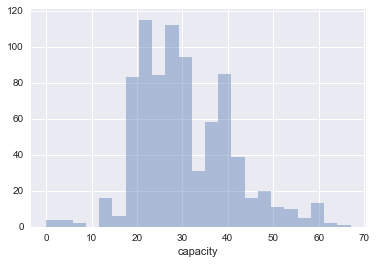

In [13]:
sns.distplot(information["capacity"], kde=False)

In [11]:
import numpy as np

In [13]:
min_status.groupby(["station_id"]).agg({"num_bikes_available": np.std,"num_bikes_available": np.max })

,num_bikes_available
station_id,
72,15
79,20
82,22
83,17
119,9
120,15
127,31
128,9
143,13


In [ ]:
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

# Load the long-form example gammas dataset
gammas = sns.load_dataset("gammas")

# Plot the response with standard error
sns.tsplot(data=min_status, time="last_reported",
           condition="station_id", value="num_bikes_available")
import matplotlib.pyplot as plt
plt.show()

In [ ]:
gammas 

In [25]:
x = '/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_logs/2018-04-06/station_status_1523065135.json'

In [29]:
file = open(x,'r')
body = file.read()
data = ast.literal_eval(body)
stations = pd.DataFrame(data['data']['stations'])

In [28]:
import ast

In [33]:
data["last_updated"]

1523065135

In [34]:
pd.to_datetime(data["last_updated"], unit='s')

Timestamp('2018-04-07 01:38:55')

In [35]:
stations.dtypes

eightd_active_station_services    object
eightd_has_available_keys           bool
is_installed                       int64
is_renting                         int64
is_returning                       int64
last_reported                      int64
num_bikes_available                int64
num_bikes_disabled                 int64
num_docks_available                int64
num_docks_disabled                 int64
num_ebikes_available               int64
station_id                        object
dtype: object